In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
chu=pd.read_excel('/content/drive/MyDrive/INTERNSHIP/Madhu/Linear&Logistic/customer_churn_data.xlsx')
chu.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,0,No,North - New York
1,5575-GNVDE,NaN,0,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,0.0,0,No,West - California
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,0,Yes,East - Illinois
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,3,No,West - Illinois
4,9237-HQITU,Female,0,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0,Yes,East - Illinois


In [5]:
chu.isnull().sum()

,0
customerID,0
gender,396
SeniorCitizen,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [6]:
chu.dropna(inplace=True)

In [7]:
le=LabelEncoder()

In [8]:
ind=chu[['OnlineBackup']]
dep=chu['Churn']
for column in ind.columns:
  ind[column]=le.fit_transform(ind[column])

/tmp/ipython-input-281523324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind[column]=le.fit_transform(ind[column])


In [9]:
log=LogisticRegression()

In [10]:
log.fit(ind,dep)

LogisticRegression()

In [12]:
on=input("Enter Onlinebackup:")
pred=log.predict([[le.transform([on])[0]]])
print(pred)

Enter Onlinebackup:Yes
['No']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


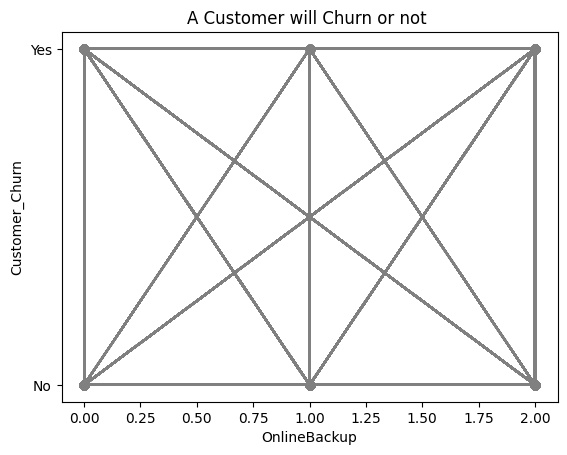

In [14]:
plt.plot(ind,dep,marker='o',color='grey',linestyle='-')
plt.xlabel("OnlineBackup")
plt.ylabel("Customer_Churn")
plt.title("A Customer will Churn or not ")
plt.show()